
1. Find the dataset link and implement the same using Python code (Cleaning, Feature Selection, Feature Elimination, Root node Selection, Model Building and Visualization)
2. Document to be uploaded in VTop 1) Objective 2) Dataset Link 3) Description of your work 4) Word document containing Implementation, Visualization of (Precision, Recall, F1 Score, Accuracy, TPR, FPR, RoC curve) 5) Conclusion

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/lung-cancer/lung-cancer.data",header=None)

In [ ]:
# Assign attribute names
attribute_names = ['ClassLabel'] + [f'Attribute{i}' for i in range(1, 57)]  # Assuming 'ClassLabel' as the class attribute name

# Set the column names
df.columns = attribute_names

# Print the updated dataset
df.head()


,ClassLabel,Attribute1,Attribute2,Attribute3,Attribute4,Attribute5,Attribute6,Attribute7,Attribute8,Attribute9,...,Attribute47,Attribute48,Attribute49,Attribute50,Attribute51,Attribute52,Attribute53,Attribute54,Attribute55,Attribute56
0,1,0,3,0,?,0,2,2,2,1,...,2,2,2,2,2,1,1,1,2,2
1,1,0,3,3,1,0,3,1,3,1,...,2,2,2,2,2,2,2,1,2,2
2,1,0,3,3,2,0,3,3,3,1,...,2,2,2,2,2,2,2,2,1,2
3,1,0,2,3,2,1,3,3,3,1,...,2,2,2,2,2,2,2,2,2,2
4,1,0,3,2,1,1,3,3,3,2,...,2,2,2,2,2,2,2,1,2,2


In [ ]:
df.describe()

,ClassLabel,Attribute1,Attribute2,Attribute3,Attribute5,Attribute6,Attribute7,Attribute8,Attribute9,Attribute10,...,Attribute47,Attribute48,Attribute49,Attribute50,Attribute51,Attribute52,Attribute53,Attribute54,Attribute55,Attribute56
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,...,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000
mean,2.031250,0.031250,2.375000,2.031250,0.281250,2.187500,2.125000,2.406250,1.156250,1.406250,...,2.062500,2.062500,2.000000,2.000000,2.000000,1.843750,1.843750,1.562500,1.812500,1.718750
std,0.782237,0.176777,0.553581,1.031265,0.456803,0.737804,0.751343,0.756024,0.514899,0.559918,...,0.245935,0.245935,0.359211,0.359211,0.508001,0.447889,0.447889,0.504016,0.396558,0.456803
min,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,0.000000,2.000000,1.750000,0.000000,2.000000,2.000000,2.000000,1.000000,1.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,1.000000
50%,2.000000,0.000000,2.000000,2.000000,0.000000,2.000000,2.000000,3.000000,1.000000,1.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
75%,3.000000,0.000000,3.000000,3.000000,1.000000,3.000000,3.000000,3.000000,1.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,3.000000,1.000000,3.000000,3.000000,1.000000,3.000000,3.000000,3.000000,3.000000,3.000000,...,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,2.000000,2.000000,2.000000


# Step 1: Data Cleaning

we can not drop the row beacuse number of row is less

In [ ]:
# Replace missing values
df = df.replace('?', pd.NA)


fill the null value with nearest integer of mean

In [ ]:
# Convert "Attribute4" column to numeric
df["Attribute4"] = pd.to_numeric(df["Attribute4"], errors="coerce")

# Calculate the mode of the "Attribute4" column
attribute4_mode = df["Attribute4"].mode()[0]

# Fill the missing values in "Attribute4" with the mode
df["Attribute4"] = df["Attribute4"].fillna(attribute4_mode)

In [ ]:
# Convert "Attribute4" column to numeric
df["Attribute38"] = pd.to_numeric(df["Attribute38"], errors="coerce")

# Calculate the mode of the "Attribute4" column
attribute4_mode = df["Attribute38"].mode()[0]

# Fill the missing values in "Attribute4" with the mode
df["Attribute38"] = df["Attribute38"].fillna(attribute4_mode)

In [ ]:
print(df["Attribute38"].describe())
print(df["Attribute4"].describe())

count    32.000000
mean      1.718750
std       0.581121
min       1.000000
25%       1.000000
50%       2.000000
75%       2.000000
max       3.000000
Name: Attribute38, dtype: float64
count    32.000000
mean      1.343750
std       0.545325
min       0.000000
25%       1.000000
50%       1.000000
75%       2.000000
max       2.000000
Name: Attribute4, dtype: float64


In [ ]:
df.describe()

,ClassLabel,Attribute1,Attribute2,Attribute3,Attribute4,Attribute5,Attribute6,Attribute7,Attribute8,Attribute9,...,Attribute47,Attribute48,Attribute49,Attribute50,Attribute51,Attribute52,Attribute53,Attribute54,Attribute55,Attribute56
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,...,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000
mean,2.031250,0.031250,2.375000,2.031250,1.343750,0.281250,2.187500,2.125000,2.406250,1.156250,...,2.062500,2.062500,2.000000,2.000000,2.000000,1.843750,1.843750,1.562500,1.812500,1.718750
std,0.782237,0.176777,0.553581,1.031265,0.545325,0.456803,0.737804,0.751343,0.756024,0.514899,...,0.245935,0.245935,0.359211,0.359211,0.508001,0.447889,0.447889,0.504016,0.396558,0.456803
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,...,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,0.000000,2.000000,1.750000,1.000000,0.000000,2.000000,2.000000,2.000000,1.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,1.000000
50%,2.000000,0.000000,2.000000,2.000000,1.000000,0.000000,2.000000,2.000000,3.000000,1.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
75%,3.000000,0.000000,3.000000,3.000000,2.000000,1.000000,3.000000,3.000000,3.000000,1.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,3.000000,1.000000,3.000000,3.000000,2.000000,1.000000,3.000000,3.000000,3.000000,3.000000,...,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,2.000000,2.000000,2.000000


In [ ]:
print("Missing values:")
print(df.isnull().sum())

Missing values:
ClassLabel     0
Attribute1     0
Attribute2     0
Attribute3     0
Attribute4     0
Attribute5     0
Attribute6     0
Attribute7     0
Attribute8     0
Attribute9     0
Attribute10    0
Attribute11    0
Attribute12    0
Attribute13    0
Attribute14    0
Attribute15    0
Attribute16    0
Attribute17    0
Attribute18    0
Attribute19    0
Attribute20    0
Attribute21    0
Attribute22    0
Attribute23    0
Attribute24    0
Attribute25    0
Attribute26    0
Attribute27    0
Attribute28    0
Attribute29    0
Attribute30    0
Attribute31    0
Attribute32    0
Attribute33    0
Attribute34    0
Attribute35    0
Attribute36    0
Attribute37    0
Attribute38    0
Attribute39    0
Attribute40    0
Attribute41    0
Attribute42    0
Attribute43    0
Attribute44    0
Attribute45    0
Attribute46    0
Attribute47    0
Attribute48    0
Attribute49    0
Attribute50    0
Attribute51    0
Attribute52    0
Attribute53    0
Attribute54    0
Attribute55    0
Attribute56    0
dtype: int64


In [ ]:
df["Attribute4"] = df["Attribute4"].astype(int)
df["Attribute38"] = df["Attribute38"].astype(int)

In [ ]:
# Convert attribute 4 to numeric data type
df['Attribute4'] = pd.to_numeric(df['Attribute4'], errors='coerce')

# Check the data types of the columns
print(df.dtypes)

# Use describe() to get descriptive statistics including attribute 4
print(df.describe())

ClassLabel     int64
Attribute1     int64
Attribute2     int64
Attribute3     int64
Attribute4     int64
Attribute5     int64
Attribute6     int64
Attribute7     int64
Attribute8     int64
Attribute9     int64
Attribute10    int64
Attribute11    int64
Attribute12    int64
Attribute13    int64
Attribute14    int64
Attribute15    int64
Attribute16    int64
Attribute17    int64
Attribute18    int64
Attribute19    int64
Attribute20    int64
Attribute21    int64
Attribute22    int64
Attribute23    int64
Attribute24    int64
Attribute25    int64
Attribute26    int64
Attribute27    int64
Attribute28    int64
Attribute29    int64
Attribute30    int64
Attribute31    int64
Attribute32    int64
Attribute33    int64
Attribute34    int64
Attribute35    int64
Attribute36    int64
Attribute37    int64
Attribute38    int64
Attribute39    int64
Attribute40    int64
Attribute41    int64
Attribute42    int64
Attribute43    int64
Attribute44    int64
Attribute45    int64
Attribute46    int64
Attribute47  

##DATA CLEANNING IS OVER

............................

##Step 2: Feature Selection & Feature Elimination

In [ ]:
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

In [ ]:
# Separate the feature matrix (X) and the target variable (y)
X = df.drop("ClassLabel", axis=1)
y = df["ClassLabel"]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=52)

In [ ]:
# Apply PCA for dimensionality reduction
pca = PCA(n_components=19)  
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

##KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report,mean_absolute_error, mean_squared_error, r2_score,f1_score,precision_score,recall_score,precision_recall_fscore_support
from sklearn.preprocessing import StandardScaler

# Create a KNN classifier
knn = KNeighborsClassifier()

# Train the model
knn.fit(X_train_pca, y_train)

# Make predictions on the testing set
y_pred_KNN = knn.predict(X_test_pca)

# Evaluate the model's performance
accuracy_KNN = accuracy_score(y_test, y_pred_KNN)
print("Accuracy:", accuracy_KNN)

f1_score_KNN=f1_score(y_test,y_pred_KNN,average='macro')
print("F1_score : ",f1_score_KNN)

precision_KNN=precision_score(y_test,y_pred_KNN,average='macro')
print("Precision : ",precision_KNN)

mse_KNN=mean_squared_error(y_test,y_pred_KNN)
print("MSE : ",mse_KNN)

rmse_KNN=np.sqrt(mse_KNN)
print("RMSE : ",rmse_KNN)

mae_KNN=mean_absolute_error(y_test,y_pred_KNN)
print("MAE : ",mae_KNN)


Accuracy: 0.8571428571428571
F1_score :  0.6190476190476191
Precision :  0.6666666666666666
MSE :  0.14285714285714285
RMSE :  0.3779644730092272
MAE :  0.14285714285714285


In [ ]:
print(y_test.values)
print(y_pred_KNN)

[2 2 2 1 1 2 1]
[2 2 2 1 1 3 1]


In [ ]:
report = classification_report(y_test, y_pred_KNN)
print(report)

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         3
           2       1.00      0.75      0.86         4
           3       0.00      0.00      0.00         0

    accuracy                           0.86         7
   macro avg       0.67      0.58      0.62         7
weighted avg       1.00      0.86      0.92         7



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn import metrics

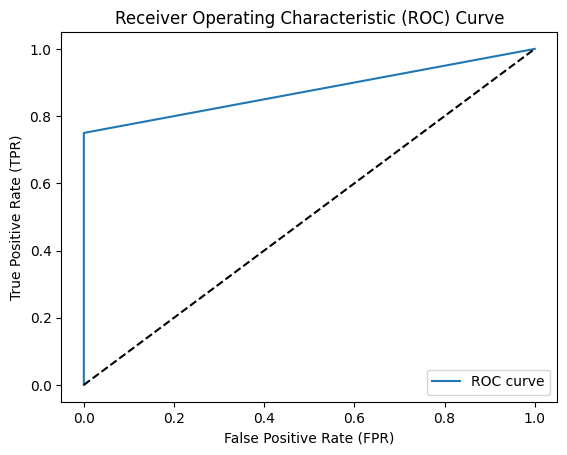

In [ ]:
# Binarize the true labels
y_test_bin = np.where(y_test == 2, 1, 0)

# Compute the probabilities for positive class
y_scores = np.where(y_pred_KNN == 2, 1, 0)

# Calculate the False Positive Rate (FPR) and True Positive Rate (TPR)
fpr, tpr, _ = metrics.roc_curve(y_test_bin, y_scores)

# Calculate the Area Under the ROC Curve (AUC)
roc_auc = metrics.auc(fpr, tpr)

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random classifier
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


##Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report,mean_absolute_error, mean_squared_error, r2_score,f1_score,precision_score,recall_score,precision_recall_fscore_support


# Create a Naive Bayes classifier
nb = GaussianNB()

# Train the model
nb.fit(X_train_pca, y_train)

# Make predictions on the testing set
y_pred_NaiveBayes = nb.predict(X_test_pca)

# Evaluate the model's performance
accuracy_NaiveBayes = accuracy_score(y_test, y_pred_NaiveBayes)
print("Accuracy:", accuracy_NaiveBayes)

f1_score_NaiveBayes=f1_score(y_test,y_pred_NaiveBayes,average='macro')
print("F1_score : ",f1_score_KNN)

precision_NaiveBayes=precision_score(y_test,y_pred_NaiveBayes,average='macro')
print("Precision : ",precision_KNN)

mse_NaiveBayes=mean_squared_error(y_test,y_pred_NaiveBayes)
print("MSE : ",mse_NaiveBayes)

rmse_NaiveBayes=np.sqrt(mse_NaiveBayes)
print("RMSE : ",rmse_NaiveBayes)

mae_NaiveBayes=mean_absolute_error(y_test,y_pred_NaiveBayes)
print("MAE : ",mae_NaiveBayes)

Accuracy: 0.2857142857142857
F1_score :  0.6190476190476191
Precision :  0.6666666666666666
MSE :  0.7142857142857143
RMSE :  0.8451542547285166
MAE :  0.7142857142857143


In [ ]:
print(y_test.values)
print(y_pred_NaiveBayes)

[2 2 2 1 1 2 1]
[1 3 2 2 2 3 1]


In [ ]:
report = classification_report(y_test, y_pred_NaiveBayes)
print(report)

              precision    recall  f1-score   support

           1       0.50      0.33      0.40         3
           2       0.33      0.25      0.29         4
           3       0.00      0.00      0.00         0

    accuracy                           0.29         7
   macro avg       0.28      0.19      0.23         7
weighted avg       0.40      0.29      0.33         7



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


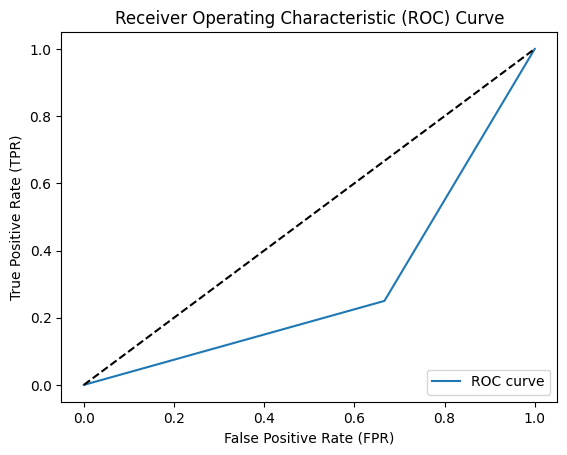

In [ ]:
# Binarize the true labels
y_test_bin = np.where(y_test == 2, 1, 0)

# Compute the probabilities for positive class
y_scores = np.where(y_pred_NaiveBayes == 2, 1, 0)

# Calculate the False Positive Rate (FPR) and True Positive Rate (TPR)
fpr, tpr, _ = metrics.roc_curve(y_test_bin, y_scores)

# Calculate the Area Under the ROC Curve (AUC)
roc_auc = metrics.auc(fpr, tpr)

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random classifier
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

##RandomForest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report,mean_absolute_error, mean_squared_error, r2_score,f1_score,precision_score,recall_score,precision_recall_fscore_support


# Create a Random Forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=52)

# Train the model
rf.fit(X_train_pca, y_train)

# Make predictions on the testing set
y_pred_RF = rf.predict(X_test_pca)


# Evaluate the model's performance
accuracy_RF = accuracy_score(y_test, y_pred_RF)
print("Accuracy:", accuracy_RF)

f1_score_RF=f1_score(y_test,y_pred_RF,average='macro')
print("F1_score : ",f1_score_RF)

precision_RF=precision_score(y_test,y_pred_RF,average='macro')
print("Precision : ",precision_RF)

mse_RF=mean_squared_error(y_test,y_pred_RF)
print("MSE : ",mse_RF)

rmse_RF=np.sqrt(mse_RF)
print("RMSE : ",rmse_RF)

mae_RF=mean_absolute_error(y_test,y_pred_RF)
print("MAE : ",mae_RF)


Accuracy: 0.5714285714285714
F1_score :  0.38888888888888884
Precision :  0.5333333333333333
MSE :  0.42857142857142855
RMSE :  0.6546536707079771
MAE :  0.42857142857142855


In [ ]:
print(y_test.values)
print(y_pred_RF)

[2 2 2 1 1 2 1]
[2 3 2 2 1 2 2]


In [ ]:
report = classification_report(y_test, y_pred_RF)
print(report)

              precision    recall  f1-score   support

           1       1.00      0.33      0.50         3
           2       0.60      0.75      0.67         4
           3       0.00      0.00      0.00         0

    accuracy                           0.57         7
   macro avg       0.53      0.36      0.39         7
weighted avg       0.77      0.57      0.60         7



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


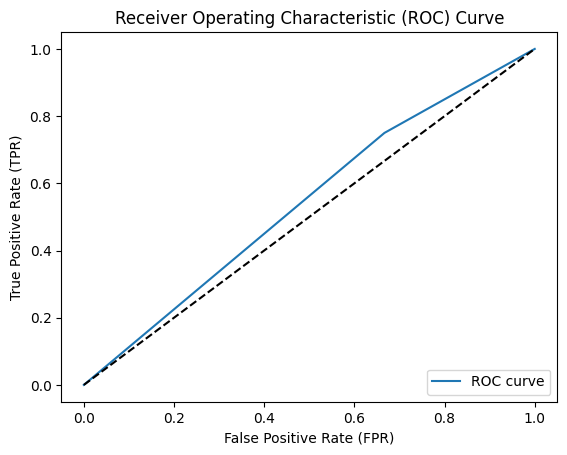

In [ ]:
# Binarize the true labels
y_test_bin = np.where(y_test == 2, 1, 0)

# Compute the probabilities for positive class
y_scores = np.where(y_pred_RF == 2, 1, 0)

# Calculate the False Positive Rate (FPR) and True Positive Rate (TPR)
fpr, tpr, _ = metrics.roc_curve(y_test_bin, y_scores)

# Calculate the Area Under the ROC Curve (AUC)
roc_auc = metrics.auc(fpr, tpr)

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random classifier
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

##DecisionTree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report,mean_absolute_error, mean_squared_error, r2_score,f1_score,precision_score,recall_score,precision_recall_fscore_support


# Create a Decision Tree classifier
dt = DecisionTreeClassifier(random_state=52)

# Train the model
dt.fit(X_train_pca, y_train)

# Make predictions on the testing set
y_pred_DT = dt.predict(X_test_pca)


# Evaluate the model's performance
accuracy_DT = accuracy_score(y_test, y_pred_DT)
print("Accuracy:", accuracy_DT)

f1_score_DT=f1_score(y_test,y_pred_DT,average='macro')
print("F1_score : ",f1_score_DT)

precision_DT=precision_score(y_test,y_pred_DT,average='macro')
print("Precision : ",precision_DT)

mse_DT=mean_squared_error(y_test,y_pred_DT)
print("MSE : ",mse_DT)

rmse_DT=np.sqrt(mse_DT)
print("RMSE : ",rmse_DT)

mae_DT=mean_absolute_error(y_test,y_pred_DT)
print("MAE : ",mae_DT)


Accuracy: 0.8571428571428571
F1_score :  0.6190476190476191
Precision :  0.6666666666666666
MSE :  0.14285714285714285
RMSE :  0.3779644730092272
MAE :  0.14285714285714285


In [ ]:
print(y_test.values)
print(y_pred_DT)

[2 2 2 1 1 2 1]
[2 3 2 1 1 2 1]


In [ ]:
report = classification_report(y_test, y_pred_DT)
print(report)

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         3
           2       1.00      0.75      0.86         4
           3       0.00      0.00      0.00         0

    accuracy                           0.86         7
   macro avg       0.67      0.58      0.62         7
weighted avg       1.00      0.86      0.92         7



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


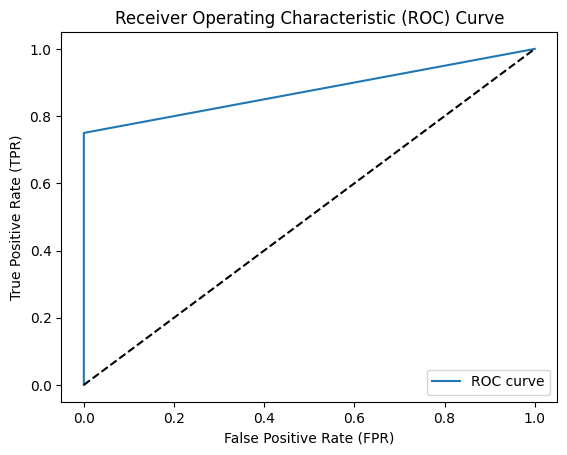

In [ ]:
# Binarize the true labels
y_test_bin = np.where(y_test == 2, 1, 0)

# Compute the probabilities for positive class
y_scores = np.where(y_pred_DT == 2, 1, 0)

# Calculate the False Positive Rate (FPR) and True Positive Rate (TPR)
fpr, tpr, _ = metrics.roc_curve(y_test_bin, y_scores)

# Calculate the Area Under the ROC Curve (AUC)
roc_auc = metrics.auc(fpr, tpr)

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random classifier
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

Accuracy vs Accuracy

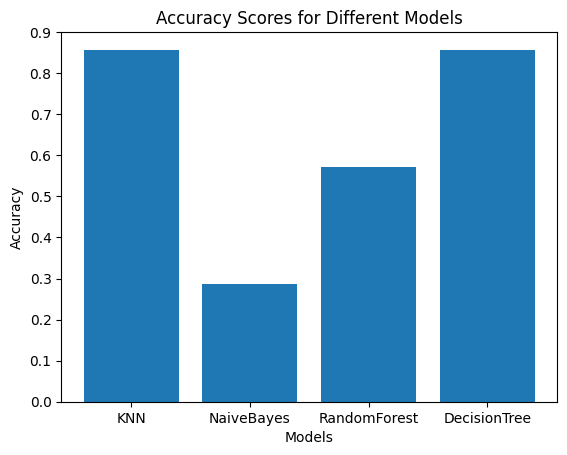

In [ ]:
model_names = ['KNN', 'NaiveBayes', 'RandomForest','DecisionTree']
accuracy_scores = [accuracy_KNN,accuracy_NaiveBayes,accuracy_RF,accuracy_DT]

# Set the x-axis positions for the bars
x = range(len(model_names))

# Create a bar plot
plt.bar(x, accuracy_scores)

# Add x-axis labels, y-axis label, and title
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy Scores for Different Models')

# Add model names as x-axis tick labels
plt.xticks(x, model_names)

# Display the plot
plt.show()

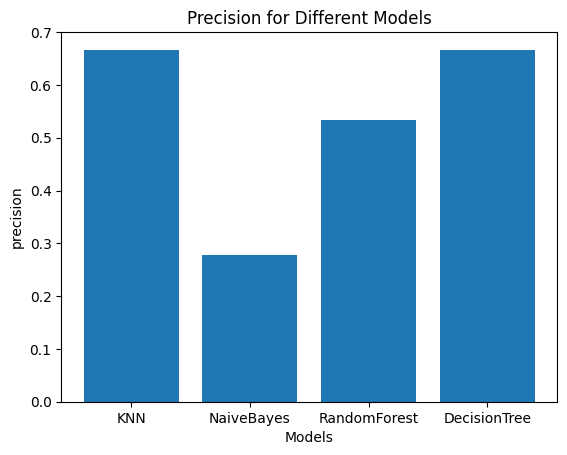

In [ ]:
model_names = ['KNN', 'NaiveBayes', 'RandomForest','DecisionTree']
accuracy_scores = [precision_KNN,precision_NaiveBayes,precision_RF,precision_DT]

# Set the x-axis positions for the bars
x = range(len(model_names))

# Create a bar plot
plt.bar(x, accuracy_scores)

# Add x-axis labels, y-axis label, and title
plt.xlabel('Models')
plt.ylabel('precision')
plt.title('Precision for Different Models')

# Add model names as x-axis tick labels
plt.xticks(x, model_names)

# Display the plot
plt.show()

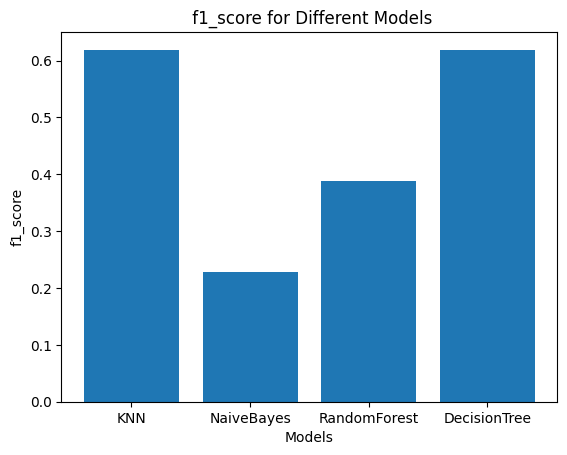

In [ ]:
model_names = ['KNN', 'NaiveBayes', 'RandomForest','DecisionTree']
accuracy_scores = [f1_score_KNN,f1_score_NaiveBayes,f1_score_RF,f1_score_DT]

# Set the x-axis positions for the bars
x = range(len(model_names))

# Create a bar plot
plt.bar(x, accuracy_scores)

# Add x-axis labels, y-axis label, and title
plt.xlabel('Models')
plt.ylabel('f1_score')
plt.title(' f1_score for Different Models')

# Add model names as x-axis tick labels
plt.xticks(x, model_names)

# Display the plot
plt.show()

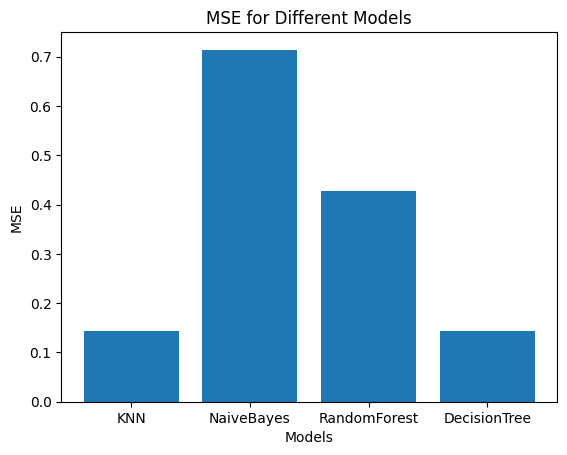

In [ ]:
model_names = ['KNN', 'NaiveBayes', 'RandomForest','DecisionTree']
accuracy_scores = [mse_KNN,mse_NaiveBayes,mse_RF,mse_DT]

# Set the x-axis positions for the bars
x = range(len(model_names))

# Create a bar plot
plt.bar(x, accuracy_scores)

# Add x-axis labels, y-axis label, and title
plt.xlabel('Models')
plt.ylabel('MSE')
plt.title('MSE for Different Models')

# Add model names as x-axis tick labels
plt.xticks(x, model_names)

# Display the plot
plt.show()

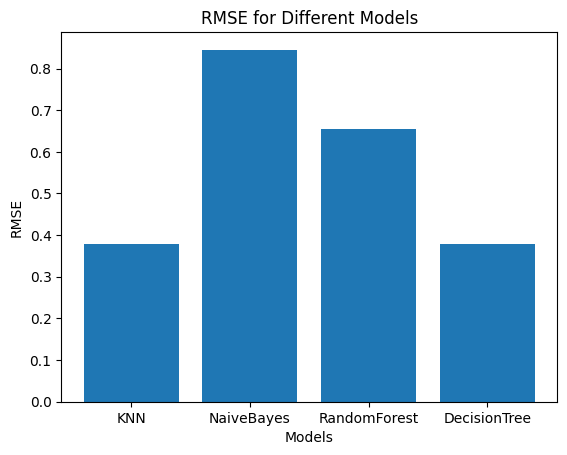

In [ ]:
model_names = ['KNN', 'NaiveBayes', 'RandomForest','DecisionTree']
accuracy_scores = [rmse_KNN,rmse_NaiveBayes,rmse_RF,rmse_DT]

# Set the x-axis positions for the bars
x = range(len(model_names))

# Create a bar plot
plt.bar(x, accuracy_scores)

# Add x-axis labels, y-axis label, and title
plt.xlabel('Models')
plt.ylabel('RMSE')
plt.title('RMSE for Different Models')

# Add model names as x-axis tick labels
plt.xticks(x, model_names)

# Display the plot
plt.show()

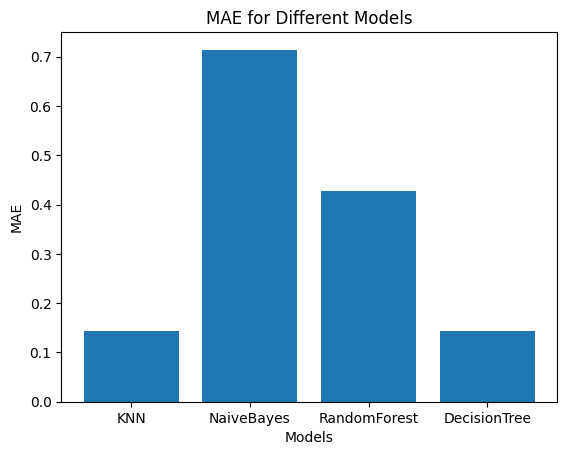

In [ ]:
model_names = ['KNN', 'NaiveBayes', 'RandomForest','DecisionTree']
accuracy_scores = [mae_KNN,mae_NaiveBayes,mae_RF,mae_DT]

# Set the x-axis positions for the bars
x = range(len(model_names))

# Create a bar plot
plt.bar(x, accuracy_scores)

# Add x-axis labels, y-axis label, and title
plt.xlabel('Models')
plt.ylabel('MAE')
plt.title('MAE for Different Models')

# Add model names as x-axis tick labels
plt.xticks(x, model_names)

# Display the plot
plt.show()